In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py
from matplotlib.animation import FuncAnimation

# Single Aggregate Input

In [9]:
h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/subregion_cut1.h5"
with h5py.File(h5_file_path, 'r') as h5file:
    for dataset_name in h5file:
        print(f"Dataset Name: {dataset_name}")

Dataset Name: green
Dataset Name: red


In [10]:
h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/subregion_cut1.h5"
with h5py.File(h5_file_path, "r") as h5f:
    green_channel = h5f["green"][:]
    red_channel = h5f["red"][:]

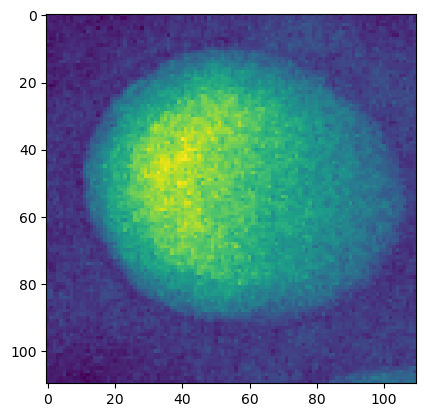

In [11]:
plt.imshow(green_channel[300][110:220, 240:350])

In [12]:
def extract_single_aggregate(channel):
    # Extract the image information for al frames. 
    aggregate = []
    for i in range(np.shape(channel)[0]):
        aggregate.append(channel[i][110:220, 240:350])
    return np.array(aggregate)

In [13]:
aggregate = extract_single_aggregate(green_channel)
np.shape(aggregate)

(375, 110, 110)

In [14]:
h5_file_path = "single_aggregate_horizontal_cut1_all_frames_tissue.h5"
with h5py.File(h5_file_path, "w") as h5f:
     h5f.create_dataset("green", data = aggregate)

In [20]:
# # Make the video for single aggregat# fig = plt.figure(figsize = (5, 5), dpi=300)
# fig = plt.figure(figsize = (5, 5), dpi=300)
# def make_frame(i):
#     plt.clf()
#     # Plotting.
#     plt.title("t="+str(i))
#     plt.imshow(aggregate[i])
#     print("tu")

# myanim = FuncAnimation(fig, make_frame, frames = np.shape(aggregate)[0]-1, interval = 500)
# myanim.save("single_aggregate_tissue1.mp4", writer="ffmpeg")

# Mask Filter 
1. Could filter the aggregate out and apply for area definition.
2. Filter out the pixels which has the distance to center smaller than R --> approximatly a circle.

In [2]:
h5_file_path = "F:/PhD_Franziska/Headon/Polarisatioin/single_aggregate_horizontal_cut1_all_frames_tissue.h5"
with h5py.File(h5_file_path, "r") as h5f:
    single_aggregate = h5f["green"][:]

In [5]:
def circle_mask(center_x, center_y, radius, img):
    # Create a grid of coordinates
    height, width = np.shape(img)[:2]
    Y, X = np.ogrid[:height, :width]
    
    # # Calculate the mask for the circle
    distance_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    circular_mask = distance_from_center <= radius
    
    # Apply the mask to get pixels within the circle
    circular_region = np.zeros_like(img)
    circular_region[circular_mask] = img[circular_mask]
    
    return circular_region

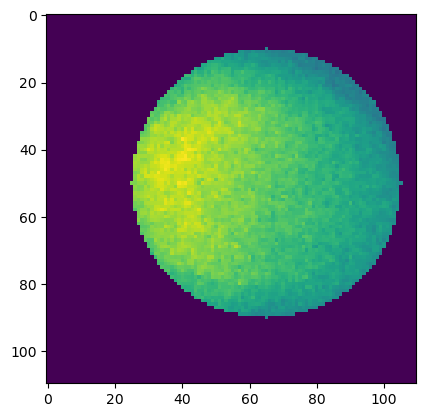

In [7]:
circle_region = circle_mask(65, 50, 40, single_aggregate[300])
plt.imshow(circle_region)

# Calculation of Polarisation: 
1. Get the vector from one pixel to the center and normalize the vector.
2. Multiple the vector with the current pixel intensity.
3. Do 1. and 2. for all pixels in the defined area from mask filter. Add them up --> A final vector.
The final vector points to the direction of polarisation and the length of the vector indicates the strength of polarisation. 

# Statistical Analysis of polarisation vector
1. The temporal dynamics of length of polarisation vector --> The strength of polarisation over time. 